In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Data import AntData, ForagerData
from os import sep as sep

In [2]:
exp_path = r"Y:\Lior&Einav\Experiments\experiment16_250820"
feeding_filename = r"forager_feeding_table.xlsx"
bdata_path = r"with food\blob analysis normalized by white paper"
trophallaxis_filename = r"trophallaxis_table.csv"
bdata_filename = "bdata_16_250820.csv"

## Load data

### feedings data

In [3]:
fdata = pd.read_excel(exp_path+sep+feeding_filename)
fdata.head()

,ant_id,feeding_start,feeding_end,food_source
0,535,0,82,yellow
1,540,25,101,yellow
2,1152,69,140,yellow
3,82,120,172,yellow
4,540,156,193,yellow


### fluorescence data

In [4]:
bdata = pd.read_csv(exp_path+sep+bdata_path+sep+bdata_filename, index_col='frame')
bdata = bdata.drop(bdata.columns[0],axis=1)
bdata.head()

,time,acquisition,a1-angle,a1-crop_area,a1-crop_intensity,a1-error,a1-original_x,a1-original_y,a1-x,a1-y,...,a1549-x,a1549-y,a408-angle,a408-crop_area,a408-crop_intensity,a408-error,a408-original_x,a408-original_y,a408-x,a408-y
frame,,,,,,,,,,,,,,,,,,,,,
36,50.400,BLGF,-41.342989,2163.0,86135.148438,0.0,3751.0,1772.0,1925.416081,1596.312639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,51.800,BLGF,-42.413813,0.0,0.000000,0.0,3750.0,1773.0,1926.500121,1597.381350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,53.199,GLRF,-41.342989,38.0,2313.172363,0.0,3749.0,1773.0,1927.569468,1597.381900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,54.606,BLGF,-41.342989,0.0,0.000000,0.0,3747.0,1775.0,1929.737547,1599.519323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,56.007,GLRF,-42.413813,10.0,578.571167,0.0,3745.0,1771.0,1931.817472,1595.247777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### trophallaxis data

In [5]:
tdata = pd.read_csv(exp_path+sep+trophallaxis_filename)
tdata.head()

,vidnum,id,actual_ant1,actual_ant2,actual_start,actual_end,general_start_frame,general_end_frame
0,1.0,1.0,1,153.0,1.0,7.0,1.0,7.0
1,1.0,9.0,171,429.0,71.0,72.0,71.0,72.0
2,1.0,12.0,76,1165.0,81.0,89.0,81.0,89.0
3,1.0,11.0,179,220.0,81.0,82.0,81.0,82.0
4,1.0,19.0,179,386.0,110.0,112.0,110.0,112.0


In [6]:
jj = tdata.query('general_end_frame < 100')#.iloc[-1]
len(jj)

4

## Experiment info

In [7]:
start_frame = bdata.index[0]
start_frame

36

In [8]:
foragers_list = fdata['ant_id'].unique()
foragers_list

array([ 535,  540, 1152,   82,  454,  429,  232,  153,   95,  180,   72],
      dtype=int64)

## Get feeding sizes

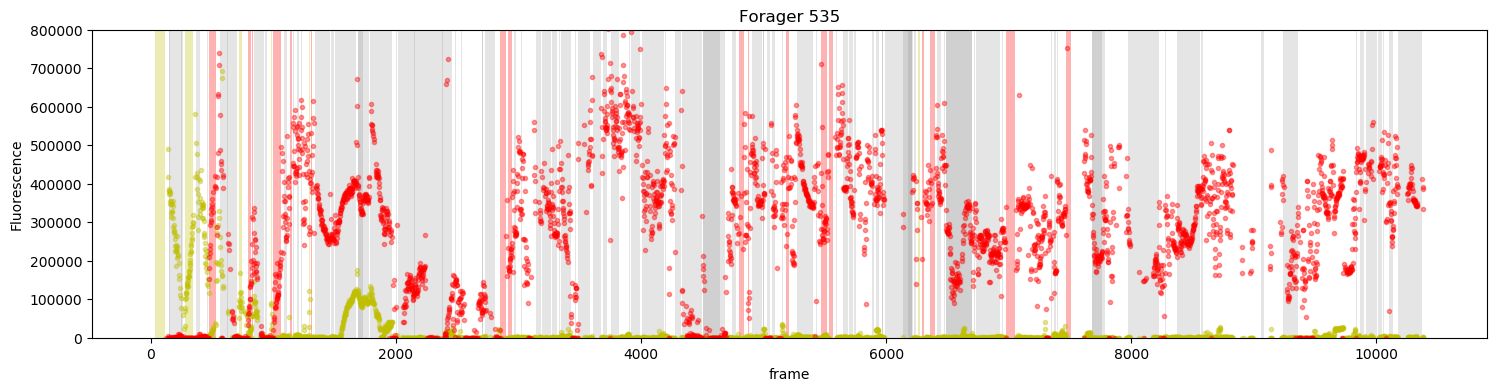

In [9]:
%matplotlib qt
forager_id = 535
F = ForagerData(ant_id=forager_id, bdata_df=bdata, feedings_df=fdata, interactions_df=tdata)
F.plot_raw_timeline()

In [10]:
F.plot_clean_timeline(times_s=bdata[['time']],conversion_factors=pd.DataFrame({'red':[1], 'yellow':[1]}))

D:\Lior\phd\Python\TwoColorAnts\Data.py:87: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  measurements_chunk = measurements.loc[frame_range]
C:\Users\liorba\Anaconda3\envs\Experimenting\lib\site-packages\numpy\lib\nanfunctions.py:1367: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\liorba\Anaconda3\envs\Experimenting\lib\site-packages\numpy\lib\nanfunctions.py:1371: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


KeyError: "None of [Float64Index([ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0,\n              11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0,\n              22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0,\n              33.0, 34.0, 35.0],\n             dtype='float64', name='frame')] are in the [index]"

In [ ]:
pd.DataFrame({'red':[1], 'yellow':[1]})

In [ ]:
# def find_last_interaction_before(feed_start_time, ant_tdata):
#     interactions_before = ant_tdata.query('general_end_frame < '+ str(feed_start_time))
#     if len(interactions_before)>0:
#         last_interaction_before = interactions_before.iloc[-1]
#         last_interaction_before_end = last_interaction_before['general_end_frame']
#     else:
#         last_interaction_before_end = 0
#     return last_interaction_before_end

In [ ]:
# def find_first_interaction_after(feed_end_time, ant_tdata, general_end_frame):
#     interaction_after = ant_tdata.query('general_start_frame > ' + str(feed_end_time))
#     if len(interactions_after)>0:
#         first_interaction_after = interaction_after.iloc[0]
#         first_interaction_after_start = first_interaction_after['general_end_frame']
#     else:
#         first_interaction_after = general_end_frame
#     return first_interaction_after_start

In [ ]:
# #for forager_id in foragers_list:
# forager_id = 535
# F = ForagerData(ant_id=forager_id, bdata_df=bdata, feedings_df=fdata, interactions_df=tdata)
#     for feeding in F.feedings_dict['yellow']:
        
